In [1]:
#for data wrangling and manipulation

import pandas as pd
import numpy as np

#for NLP text processing and formatting

import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

# For word lemmitization
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
# for word Stemming
nltk.download('omw-1.4')
from nltk.stem.porter import PorterStemmer

# for Machine Learning process

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit

# for Machine Learning model evaluation

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Global Parameters
stop_words = set(stopwords.words('english'))

from wordcloud import WordCloud

import matplotlib.pyplot as plt
%matplotlib inline

# from autosklearn.regression import AutoSklearnRegressor

import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Error loading omw-1.4: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [2]:
df=pd.read_excel("cleandata.xlsx")
df

,Unnamed: 0,country,date,isVerified,position,productAsin,ratingScore,reviewDescription,reviewTitle,username,NSentiment,tPolarity,tSubjectivity,segmentation
0,0,India,2023-04-11,True,1,B09F6S8BT6,4,tv good sound qualiti pictur qualiti also foun...,Wonderful good pic & sound quality.,Amazon Customer,Positive,0.600000,0.533333,positive
1,1,India,2023-04-20,True,2,B09F6S8BT6,4,good,How can I connect Bluetooth,DIPANJAN MAHAPATRA,Positive,0.700000,0.600000,positive
2,2,India,2023-04-20,True,3,B09F6S8BT6,4,v good tv fast instal,Good,anil bajaj,Positive,0.450000,0.600000,positive
3,3,India,2023-04-11,True,4,B09F6S8BT6,4,much featur le price nice tv love thanku amazo...,Nice..,Soheb khanSoheb khan,Positive,0.433333,0.600000,positive
4,4,India,2023-04-05,True,5,B09F6S8BT6,4,love pictur qualiti awesom sound also good del...,Value for money,AMIT MEHRA,Positive,0.500000,0.560000,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22934,1874,India,2020-08-15,True,646,B0B6PF75H5,5,purchas onida fire tv 32 awesom term pictur qu...,Awesome product,PlaceholderPlaceholder,Positive,0.600000,0.575000,positive
22935,1875,India,2021-01-27,True,647,B0B6PF75H5,5,got tv sale 14k good pictur qualiti sound snap...,Great TV in its segment,Punit Singh,Positive,0.650000,0.587500,positive
22936,1876,India,2021-04-08,True,648,B0B6PF75H5,5,tv alway better android tv pictur qualiti best...,its just osm product from onida,Eknath sanjay shingneEknath sanjay shingne,Positive,0.650000,0.450000,positive
22937,1877,India,2020-09-11,True,649,B0B6PF75H5,4,good,Good,ashwin,Positive,0.700000,0.600000,positive


### Count class

In [3]:
#Checking number of +ve ,-ve & neutral tweets
df.pivot_table(index=['segmentation'],aggfunc={'segmentation':'count'})

,segmentation
segmentation,
negative,1998
neutral,4904
positive,16037


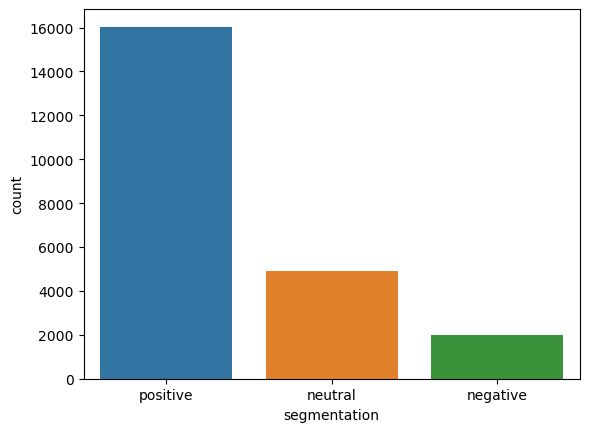

In [4]:
import seaborn as sns
df['segmentation'].value_counts()
sns.countplot(data=df, x='segmentation')
plt.show()

### Using resampling techniiques to balance the data

In [5]:
from sklearn.utils import resample

In [6]:
#create three different dataframe of majority and minority class 
df_positive = df[(df['segmentation']== "positive")] 
df_negative = df[(df['segmentation']=="negative")] 
df_neutral = df[(df['segmentation']=="neutral")] 

In [7]:
df_positive

,Unnamed: 0,country,date,isVerified,position,productAsin,ratingScore,reviewDescription,reviewTitle,username,NSentiment,tPolarity,tSubjectivity,segmentation
0,0,India,2023-04-11,True,1,B09F6S8BT6,4,tv good sound qualiti pictur qualiti also foun...,Wonderful good pic & sound quality.,Amazon Customer,Positive,0.600000,0.533333,positive
1,1,India,2023-04-20,True,2,B09F6S8BT6,4,good,How can I connect Bluetooth,DIPANJAN MAHAPATRA,Positive,0.700000,0.600000,positive
2,2,India,2023-04-20,True,3,B09F6S8BT6,4,v good tv fast instal,Good,anil bajaj,Positive,0.450000,0.600000,positive
3,3,India,2023-04-11,True,4,B09F6S8BT6,4,much featur le price nice tv love thanku amazo...,Nice..,Soheb khanSoheb khan,Positive,0.433333,0.600000,positive
4,4,India,2023-04-05,True,5,B09F6S8BT6,4,love pictur qualiti awesom sound also good del...,Value for money,AMIT MEHRA,Positive,0.500000,0.560000,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22932,1872,India,2021-07-30,True,644,B0B6PF75H5,5,overal featur product good,Picture quality is excellent,Amit Doras,Positive,0.700000,0.600000,positive
22934,1874,India,2020-08-15,True,646,B0B6PF75H5,5,purchas onida fire tv 32 awesom term pictur qu...,Awesome product,PlaceholderPlaceholder,Positive,0.600000,0.575000,positive
22935,1875,India,2021-01-27,True,647,B0B6PF75H5,5,got tv sale 14k good pictur qualiti sound snap...,Great TV in its segment,Punit Singh,Positive,0.650000,0.587500,positive
22936,1876,India,2021-04-08,True,648,B0B6PF75H5,5,tv alway better android tv pictur qualiti best...,its just osm product from onida,Eknath sanjay shingneEknath sanjay shingne,Positive,0.650000,0.450000,positive


In [8]:
df_negative

,Unnamed: 0,country,date,isVerified,position,productAsin,ratingScore,reviewDescription,reviewTitle,username,NSentiment,tPolarity,tSubjectivity,segmentation
6,6,India,2023-04-04,True,7,B09F6S8BT6,4,tabl stand provid samsung toll free number use...,no table stand provided,Nitin,Positive,-0.050000,0.500000,negative
9,9,India,2023-04-25,True,10,B09F6S8BT6,5,accord booklet sud got base 2 box person deliv...,Samsung new tv,Janice Jain,Positive,-0.800000,1.000000,negative
77,80,India,2021-09-07,True,1221,B09F6S8BT6,1,chase instal team complet tv instal stand ship...,After sales support is very poor,Dileep Kumar M,Negative,-0.400000,0.600000,negative
82,85,India,2021-12-31,True,1226,B09F6S8BT6,1,buy product money wast buy tv 15 day screen black,Bad product,Vinay khandare,Negative,-0.166667,0.433333,negative
86,89,India,2022-02-06,True,1230,B09F6S8BT6,1,ledwithout stand tabl mount wall mount sach ba...,How can possible,Gaurav Chawla,Negative,-0.700000,0.666667,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22840,1780,India,2020-07-20,True,1482,B0B6PF75H5,5,instal late,TV installation,Satish Kumar.j,Positive,-0.300000,0.600000,negative
22841,1781,India,2020-06-16,True,1483,B0B6PF75H5,5,pictur qualiti dull,Picture quality was dull,Matadeen jangid,Positive,-0.291667,0.500000,negative
22898,1838,India,2022-02-22,True,1520,B0B6PF75H5,1,bad servic onidacustom servic bad,Very bad service by Onida,jyotiranjan,Negative,-0.700000,0.666667,negative
22922,1862,India,2022-06-04,True,784,B0B6PF75H5,1,tv work three month purchas onida servic cente...,Faulty product delivered.,satyender,Negative,-0.050000,0.083333,negative


In [9]:
df_neutral

,Unnamed: 0,country,date,isVerified,position,productAsin,ratingScore,reviewDescription,reviewTitle,username,NSentiment,tPolarity,tSubjectivity,segmentation
5,5,India,2023-04-14,True,6,B09F6S8BT6,4,power consumpt 1 star run continu 4 hour,Good but,Sankar,Positive,0.0,0.0,neutral
12,13,India,2023-03-26,True,14,B09F6S8BT6,4,wall mount tabl mount item,There is no wall mount or table mount with thi...,Ananthi,Positive,0.0,0.0,neutral
18,19,India,2023-03-14,True,20,B09F6S8BT6,4,without stand,TV delivered without stand ; stand comes after...,Murugadas,Positive,0.0,0.0,neutral
19,20,India,2022-12-25,True,101,B09F6S8BT6,4,product come support stand wall hang hook inst...,Good product,roshan s.,Positive,0.0,0.0,neutral
21,22,India,2023-03-09,True,103,B09F6S8BT6,5,overal goodtabl stand screw wall mount must in...,Table stand and wall mount screw must be inclu...,aaditya p.,Positive,0.0,0.0,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22887,1827,India,2020-10-19,True,1299,B0B6PF75H5,5,valu money,Onida fire tv,Bhavesh vijay,Positive,0.0,0.0,neutral
22896,1836,India,2022-06-07,True,1518,B0B6PF75H5,1,bkwass,Bakwass,gurpreet singh,Negative,0.0,0.0,neutral
22900,1840,India,2020-06-13,True,1492,B0B6PF75H5,5,product owsom,5 star rating.,pulak maji,Positive,0.0,0.0,neutral
22908,1848,India,2020-05-16,True,1500,B0B6PF75H5,5,excel product rate,Excellent product at this rate,Rahul Sharma,Positive,0.0,0.0,neutral


In [10]:
# upsample minority class
df_minority_negative = resample(df_negative, 
                                 replace=True,    # sample with replacement
                                 n_samples= 16037, # to match majority class
                                 random_state=42)  # reproducible results


In [11]:
df_minority_neutral = resample(df_neutral, 
                                 replace=True,    # sample with replacement
                                 n_samples= 16037, # to match majority class
                                 random_state=42)  # reproducible results

In [12]:
# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_positive, df_minority_negative, df_minority_neutral])

In [13]:
df_balanced

,Unnamed: 0,country,date,isVerified,position,productAsin,ratingScore,reviewDescription,reviewTitle,username,NSentiment,tPolarity,tSubjectivity,segmentation
0,0,India,2023-04-11,True,1,B09F6S8BT6,4,tv good sound qualiti pictur qualiti also foun...,Wonderful good pic & sound quality.,Amazon Customer,Positive,0.600000,0.533333,positive
1,1,India,2023-04-20,True,2,B09F6S8BT6,4,good,How can I connect Bluetooth,DIPANJAN MAHAPATRA,Positive,0.700000,0.600000,positive
2,2,India,2023-04-20,True,3,B09F6S8BT6,4,v good tv fast instal,Good,anil bajaj,Positive,0.450000,0.600000,positive
3,3,India,2023-04-11,True,4,B09F6S8BT6,4,much featur le price nice tv love thanku amazo...,Nice..,Soheb khanSoheb khan,Positive,0.433333,0.600000,positive
4,4,India,2023-04-05,True,5,B09F6S8BT6,4,love pictur qualiti awesom sound also good del...,Value for money,AMIT MEHRA,Positive,0.500000,0.560000,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6647,752,India,2023-04-11,True,863,B07MNNH484,1,tv,Tv,subhas pal,Negative,0.000000,0.000000,neutral
21237,157,India,2020-10-28,True,1238,B0B6PF75H5,5,gr8 buy go,Best tv with fire stick inbuilt.,PRANTIK SAHA,Positive,0.000000,0.000000,neutral
13572,801,India,2022-09-29,True,2812,B09F9YQQ7B,5,igoodex lend,GOOD,HariHari,Positive,0.000000,0.000000,neutral
20581,551,India,2023-03-31,True,32,B08FD2VSD9,5,work realli well tcl alway part famili 4th tcl...,Good picture quality,AdityaAditya,Positive,0.000000,0.000000,neutral


In [14]:
df_balanced.isnull().any().count()

14

In [15]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48111 entries, 0 to 10576
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         48111 non-null  int64  
 1   country            48111 non-null  object 
 2   date               48111 non-null  object 
 3   isVerified         48111 non-null  bool   
 4   position           48111 non-null  int64  
 5   productAsin        48111 non-null  object 
 6   ratingScore        48111 non-null  int64  
 7   reviewDescription  47995 non-null  object 
 8   reviewTitle        48111 non-null  object 
 9   username           48111 non-null  object 
 10  NSentiment         48111 non-null  object 
 11  tPolarity          48111 non-null  float64
 12  tSubjectivity      48111 non-null  float64
 13  segmentation       48111 non-null  object 
dtypes: bool(1), float64(2), int64(3), object(8)
memory usage: 5.2+ MB


In [16]:
df_balanced.dropna(inplace = True)
df_balanced

,Unnamed: 0,country,date,isVerified,position,productAsin,ratingScore,reviewDescription,reviewTitle,username,NSentiment,tPolarity,tSubjectivity,segmentation
0,0,India,2023-04-11,True,1,B09F6S8BT6,4,tv good sound qualiti pictur qualiti also foun...,Wonderful good pic & sound quality.,Amazon Customer,Positive,0.600000,0.533333,positive
1,1,India,2023-04-20,True,2,B09F6S8BT6,4,good,How can I connect Bluetooth,DIPANJAN MAHAPATRA,Positive,0.700000,0.600000,positive
2,2,India,2023-04-20,True,3,B09F6S8BT6,4,v good tv fast instal,Good,anil bajaj,Positive,0.450000,0.600000,positive
3,3,India,2023-04-11,True,4,B09F6S8BT6,4,much featur le price nice tv love thanku amazo...,Nice..,Soheb khanSoheb khan,Positive,0.433333,0.600000,positive
4,4,India,2023-04-05,True,5,B09F6S8BT6,4,love pictur qualiti awesom sound also good del...,Value for money,AMIT MEHRA,Positive,0.500000,0.560000,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6647,752,India,2023-04-11,True,863,B07MNNH484,1,tv,Tv,subhas pal,Negative,0.000000,0.000000,neutral
21237,157,India,2020-10-28,True,1238,B0B6PF75H5,5,gr8 buy go,Best tv with fire stick inbuilt.,PRANTIK SAHA,Positive,0.000000,0.000000,neutral
13572,801,India,2022-09-29,True,2812,B09F9YQQ7B,5,igoodex lend,GOOD,HariHari,Positive,0.000000,0.000000,neutral
20581,551,India,2023-03-31,True,32,B08FD2VSD9,5,work realli well tcl alway part famili 4th tcl...,Good picture quality,AdityaAditya,Positive,0.000000,0.000000,neutral


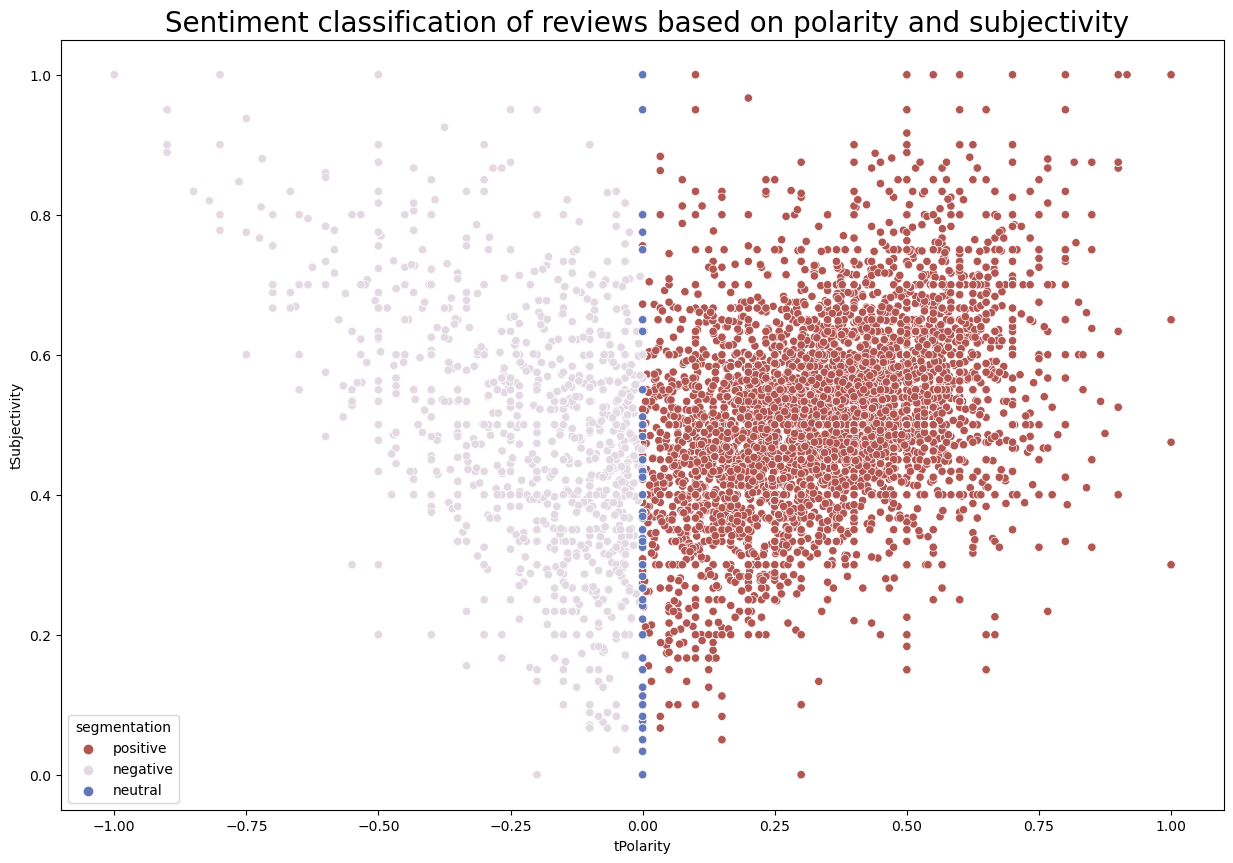

In [17]:
plt.figure(figsize=(15, 10))
sns.scatterplot(df_balanced['tPolarity'], df_balanced['tSubjectivity'], 
                hue = df_balanced['segmentation'], edgecolor='white', palette="twilight_shifted_r")
plt.title(" Sentiment classification of reviews based on polarity and subjectivity", fontsize=20)
plt.show()

In [18]:
#df_balanced.to_excel("df_balanced.xlsx")

In [19]:
#Checking number of +ve ,-ve & neutral tweets
df_balanced.pivot_table(index=['segmentation'],aggfunc={'segmentation':'count'})

,segmentation
segmentation,
negative,16037
neutral,15921
positive,16037


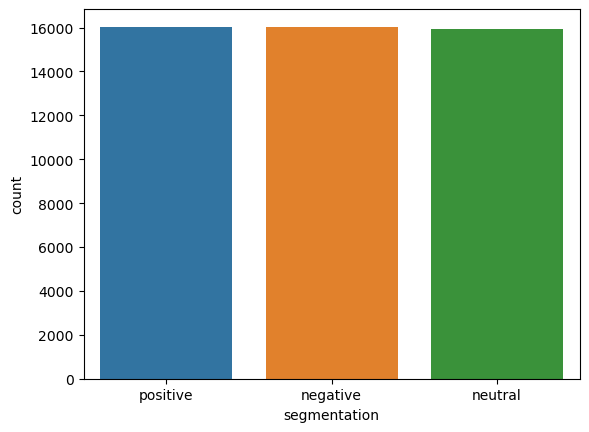

In [20]:
import seaborn as sns
df_balanced['segmentation'].value_counts()
sns.countplot(data=df_balanced, x='segmentation')
plt.show()

### Train Test split

In [21]:
from sklearn.model_selection import train_test_split

X_train ,X_test , y_train, y_test = train_test_split(
    df_balanced[['reviewDescription']],
    df_balanced[['segmentation']],
    test_size=0.2,
    random_state=42
)

## Feature extraction

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
vectorizer= TfidfVectorizer()

X_train_vect= vectorizer.fit_transform(X_train['reviewDescription'])
X_test_vect= vectorizer.transform(X_test['reviewDescription'])

y_train=y_train['segmentation'].map({"positive":0,"negative":1,"neutral":2})
y_test=y_test['segmentation'].map({"positive":0,"negative":1,"neutral":2})

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Multinomial Naive Bayes

In [46]:
model_NB = MultinomialNB()
model_NB.fit(X_train_vect,y_train)
y_predict= model_NB.predict(X_test_vect)
print(classification_report(y_test,y_predict))
cm = confusion_matrix(y_test,y_predict)
print(cm)

sa = accuracy_score(y_test, y_predict)
sp = precision_score(y_test, y_predict, average='weighted')
sr = recall_score(y_test, y_predict, average='weighted')
sf1 = f1_score(y_test, y_predict, average='weighted')
print("........................................................")
print('Accuracy:', sa)
print('Precision:', sp)
print('Recall:', sr)
print('F1 score:', sf1)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3169
           1       0.79      0.96      0.86      3250
           2       0.97      0.74      0.84      3180

    accuracy                           0.87      9599
   macro avg       0.88      0.87      0.86      9599
weighted avg       0.88      0.87      0.86      9599

[[2825  310   34]
 [  90 3117   43]
 [ 270  542 2368]]
........................................................
Accuracy: 0.8657151786644443
Precision: 0.8795712467402085
Recall: 0.8657151786644443
F1 score: 0.8648668810808079


### Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train_vect,y_train)
y_predict= model_RF.predict(X_test_vect)

print(classification_report(y_test,y_predict))
cm = confusion_matrix(y_test,y_predict)
print(cm)

sa = accuracy_score(y_test, y_predict)
sp = precision_score(y_test, y_predict, average='weighted')
sr = recall_score(y_test, y_predict, average='weighted')
sf1 = f1_score(y_test, y_predict, average='weighted')
print("........................................................")
print('Accuracy:', sa)
print('Precision:', sp)
print('Recall:', sr)
print('F1 score:', sf1)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      3169
           1       0.98      1.00      0.99      3250
           2       0.98      1.00      0.99      3180

    accuracy                           0.99      9599
   macro avg       0.99      0.99      0.99      9599
weighted avg       0.99      0.99      0.99      9599

[[3062   57   50]
 [   0 3250    0]
 [   7    6 3167]]
........................................................
Accuracy: 0.9874986977810188
Precision: 0.9876596510536461
Recall: 0.9874986977810188
F1 score: 0.9874539865956969


### Extra Tree Classifier

In [27]:
from sklearn.ensemble import ExtraTreesClassifier

In [48]:
model_extra = ExtraTreesClassifier()
model_extra.fit(X_train_vect,y_train)
y_predict= model_extra.predict(X_test_vect)
print(classification_report(y_test,y_predict))
cm = confusion_matrix(y_test,y_predict)
print(cm)

sa = accuracy_score(y_test, y_predict)
sp = precision_score(y_test, y_predict, average='weighted')
sr = recall_score(y_test, y_predict, average='weighted')
sf1 = f1_score(y_test, y_predict, average='weighted')
print("........................................................")
print('Accuracy:', sa)
print('Precision:', sp)
print('Recall:', sr)
print('F1 score:', sf1)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3169
           1       0.99      1.00      1.00      3250
           2       1.00      0.99      0.99      3180

    accuracy                           0.99      9599
   macro avg       0.99      0.99      0.99      9599
weighted avg       0.99      0.99      0.99      9599

[[3133   22   14]
 [   0 3250    0]
 [  19    9 3152]]
........................................................
Accuracy: 0.9933326388165434
Precision: 0.9933460273067201
Recall: 0.9933326388165434
F1 score: 0.9933277720576962


### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [49]:
model_LR=LogisticRegression()
model_LR.fit(X_train_vect,y_train)
y_predict= model_LR.predict(X_test_vect)
print(classification_report(y_test,y_predict))
cm = confusion_matrix(y_test,y_predict)
print(cm)
sa = accuracy_score(y_test, y_predict)
sp = precision_score(y_test, y_predict, average='weighted')
sr = recall_score(y_test, y_predict, average='weighted')
sf1 = f1_score(y_test, y_predict, average='weighted')
print("........................................................")
print('Accuracy:', sa)
print('Precision:', sp)
print('Recall:', sr)
print('F1 score:', sf1)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      3169
           1       0.97      1.00      0.98      3250
           2       0.97      0.99      0.98      3180

    accuracy                           0.98      9599
   macro avg       0.98      0.98      0.98      9599
weighted avg       0.98      0.98      0.98      9599

[[3006   82   81]
 [   5 3236    9]
 [   0   30 3150]]
........................................................
Accuracy: 0.9784352536722575
Precision: 0.9789230826659855
Recall: 0.9784352536722575
F1 score: 0.9783674250391158


### Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_vect,y_train)
y_predict= model_DT.predict(X_test_vect)
print(classification_report(y_test,y_predict))
cm = confusion_matrix(y_test,y_predict)
print(cm)
sa = accuracy_score(y_test, y_predict)
sp = precision_score(y_test, y_predict, average='weighted')
sr = recall_score(y_test, y_predict, average='weighted')
sf1 = f1_score(y_test, y_predict, average='weighted')
print("........................................................")
print('Accuracy:', sa)
print('Precision:', sp)
print('Recall:', sr)
print('F1 score:', sf1)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99      3169
           1       0.98      1.00      0.99      3250
           2       0.99      1.00      0.99      3180

    accuracy                           0.99      9599
   macro avg       0.99      0.99      0.99      9599
weighted avg       0.99      0.99      0.99      9599

[[3085   51   33]
 [   0 3250    0]
 [   4    2 3174]]
........................................................
Accuracy: 0.9906240233357642
Precision: 0.9907307714706073
Recall: 0.9906240233357642
F1 score: 0.9905963415310364


### K- Neighbour Classifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
model_KN = KNeighborsClassifier(n_neighbors=10)
model_KN.fit(X_train_vect,y_train)
y_predict= model_KN.predict(X_test_vect)
print(classification_report(y_test,y_predict))
cm = confusion_matrix(y_test,y_predict)
print(cm)
sa = accuracy_score(y_test, y_predict)
sp = precision_score(y_test, y_predict, average='weighted')
sr = recall_score(y_test, y_predict, average='weighted')
sf1 = f1_score(y_test, y_predict, average='weighted')
print("........................................................")
print('Accuracy:', sa)
print('Precision:', sp)
print('Recall:', sr)
print('F1 score:', sf1)

              precision    recall  f1-score   support

           0       0.96      0.55      0.70      3169
           1       0.97      0.84      0.90      3250
           2       0.62      0.97      0.76      3180

    accuracy                           0.79      9599
   macro avg       0.85      0.79      0.79      9599
weighted avg       0.85      0.79      0.79      9599

[[1746   47 1376]
 [   7 2746  497]
 [  62   38 3080]]
........................................................
Accuracy: 0.7888321700177102
Precision: 0.8520068195258094
Recall: 0.7888321700177102
F1 score: 0.7880092117635844


In [35]:
from sklearn import svm

In [36]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      3169
           1       0.99      1.00      0.99      3250
           2       0.99      1.00      0.99      3180

    accuracy                           0.99      9599
   macro avg       0.99      0.99      0.99      9599
weighted avg       0.99      0.99      0.99      9599

[[3101   28   40]
 [   0 3250    0]
 [   1   14 3165]]


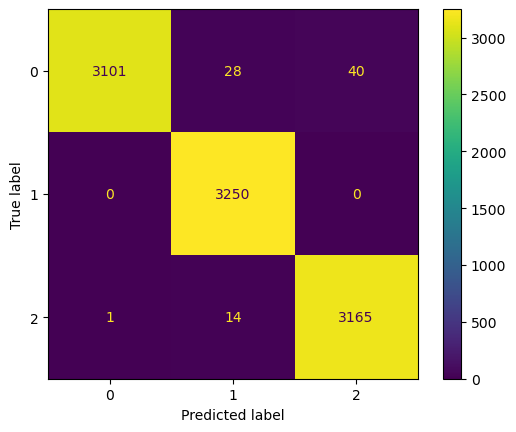

In [37]:
model_SVC = svm.LinearSVC(random_state=100)
model_SVC.fit(X_train_vect,y_train)
y_predict= model_SVC.predict(X_test_vect)
print(classification_report(y_test,y_predict))
cm = confusion_matrix(y_test,y_predict)
print(cm)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)

cm_display.plot()
plt.show()

# Ensemble model

In [38]:
from sklearn.ensemble import VotingClassifier

In [39]:
ensemble_model = VotingClassifier(estimators=[('nb', model_NB), ('rf',model_RF),('et',model_extra),('lr', model_LR), ('dt',model_DT),('kn',model_KN)], voting='soft')

In [40]:
ensemble_model.fit(X_train_vect, y_train)

VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('rf', RandomForestClassifier()),
                             ('et', ExtraTreesClassifier()),
                             ('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('kn', KNeighborsClassifier(n_neighbors=10))],
                 voting='soft')

Accuracy: 0.9879154078549849
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      3169
           1       0.98      1.00      0.99      3250
           2       0.98      1.00      0.99      3180

    accuracy                           0.99      9599
   macro avg       0.99      0.99      0.99      9599
weighted avg       0.99      0.99      0.99      9599

[[3056   55   58]
 [   0 3250    0]
 [   0    3 3177]]


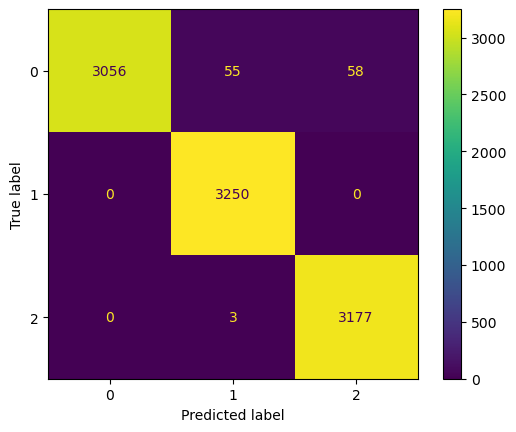

........................................................
Accuracy: 0.9879154078549849
Precision: 0.9881240773312128
Recall: 0.9879154078549849
F1 score: 0.9878625226207913


In [52]:
y_predict = ensemble_model.predict(X_test_vect)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
print(cm)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)

cm_display.plot()
plt.show()
sa = accuracy_score(y_test, y_predict)
sp = precision_score(y_test, y_predict, average='weighted')
sr = recall_score(y_test, y_predict, average='weighted')
sf1 = f1_score(y_test, y_predict, average='weighted')
print("........................................................")
print('Accuracy:', sa)
print('Precision:', sp)
print('Recall:', sr)
print('F1 score:', sf1)